# Following will be the steps we will follow to perform linear regression on the dataset.¶

## Setup
* Step 1 : Import Necessary Libraries
* Step 2 : Load Data
* Step 3 : Start Exploring dataset
* Step 4 : Use Seaborn to visualize the dataset
* Step 5 : Preparing X and y
* Step 6 : Splitting X and y into training and testing sets
* Step 7 : Linear regression using scikit-learn
* Step 8 : Predictions on testing data and metrics
* Step 9 : Let's try to see if removing high leverage points help to increase the performance of the model with 3 features
* Step 10 : Let's try to see if considering all the parameters would have increased the performance?

### Step 1 : Import Necessary Libraries

In [37]:
#Import numpy and pandas
import numpy as np
import pandas as pd

#import matplotlib and seaborn for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Magic line to print graph on same notebook
%matplotlib inline

### Step 2 : Load Data

In [38]:
#Import data in pandas dataframe
abalaone_df = pd.read_csv("../../data/abalone/Dataset.data", delimiter=" ",
                         names=['Sex', 'Length', 'Diameter', 'Height', 
                                'Whole weight', 'Shucked weight', 'Viscera weight',
                                'Shell weight', 'Rings'])

### Step 3 : Start exploring dataset 

In [39]:
#Print the shape of the dataframe
print abalaone_df.shape
#Now lets print some starting rows
abalaone_df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Step 4 : Lets use seaborn library to visualize the dataset 

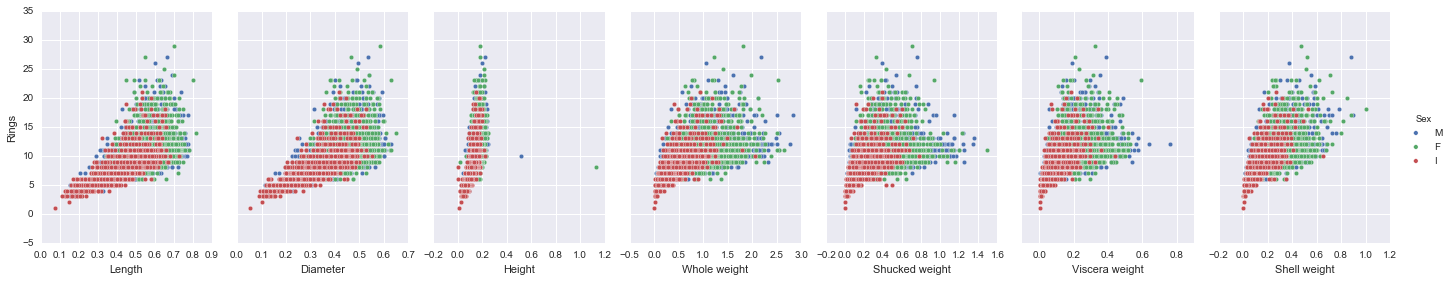

In [40]:
sns.pairplot(abalaone_df, x_vars=['Length','Diameter','Height','Whole weight','Shucked weight'
                                 ,'Viscera weight','Shell weight'], y_vars='Rings', hue='Sex',
                                 size=4, aspect=0.7)

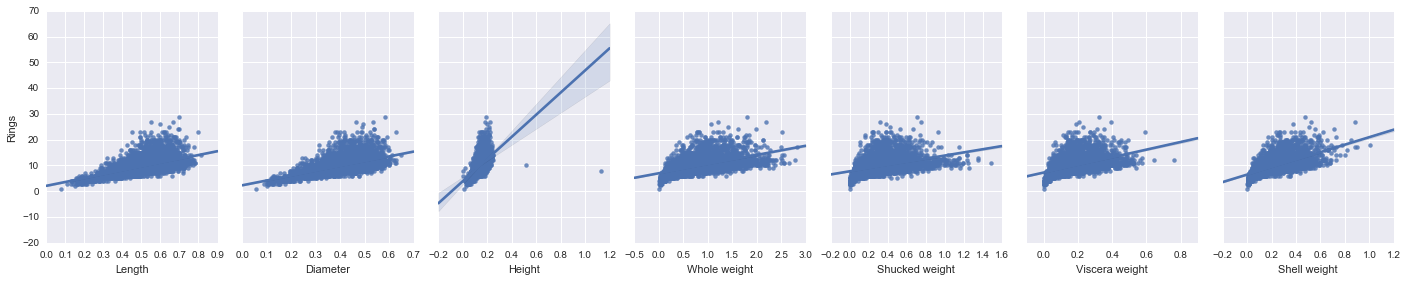

In [41]:
sns.pairplot(abalaone_df, x_vars=['Length','Diameter','Height','Whole weight','Shucked weight'
                                 ,'Viscera weight','Shell weight'], y_vars='Rings', 
                                 size=4, aspect=0.7, kind='reg')

### Step 5 : Preparing X and y

In [43]:
#Create a feature list
features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight',
            'Shell weight']

#Use this list as to select subset of Series of dataframe
X = abalaone_df[features]
y = abalaone_df['Rings']

#Print the dimesions of X and y
print "Dimensions of X : " + str(X.shape)
print "Dimensions of y : " + str(y.shape)
print 

Dimensions of X : (4177, 7)
Dimensions of y : (4177,)



### Step 6 : Splitting X and y into training and testing sets

In [44]:
from sklearn.cross_validation import train_test_split
#Default breakup is 75% and 25%
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Step 7 : Linear Model (Ordinary Least squares) using scikit

In [45]:
from sklearn.linear_model import LinearRegression
#Create instance of the model
lin_reg = LinearRegression()
#Learn the model on the dataset
lin_reg.fit(X_train, y_train)
#Print intercept and coefficients
print "Intercept : " + str(lin_reg.intercept_)
print zip(features, lin_reg.coef_)
#Calculating the RMSE
y_pred = lin_reg.predict(X_test)
RSS = np.mean((y_test - y_pred)**2)
RMSE_manual = np.sqrt(RSS)
print "RMSE Manual : " + str(RMSE_manual)
#Or 
from sklearn import metrics
RMSE_metric = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print "RMSE Metric : " + str(RMSE_metric)

Intercept : 3.27533962683
[('Length', -1.0248591685607078), ('Diameter', 11.699014688853012), ('Height', 11.512865419414714), ('Whole weight', 9.2469474356368284), ('Shucked weight', -19.957250408260684), ('Viscera weight', -9.8306167163109599), ('Shell weight', 8.8801680299402612)]
RMSE Manual : 2.21722052746
RMSE Metric : 2.21722052746


### Step 8 : Measrure the quality of predictions

In [46]:
#Method 1 : Estimator Model method
estimator_model_score = lin_reg.score(X_test, y_test)
print "Estimator method score : " + str(estimator_model_score)

#Method 2 : Metric functions method
from sklearn.metrics import explained_variance_score
metric_method_score = explained_variance_score(y_test, y_pred)
print "Metrics method score : " + str(metric_method_score)

#Method 3 : Evaluate a score by cross validation
from sklearn.cross_validation import cross_val_score
cross_valid_score = cross_val_score(lin_reg, X, y)
print "Cross valid score average of 3 folds : " + str(cross_valid_score.mean())

Estimator method score : 0.543157480103
Metrics method score : 0.543724319064
Cross valid score average of 3 folds : 0.486054567711


### Step 9 : plot output

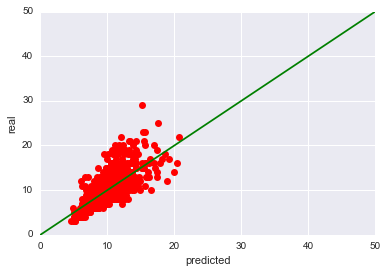

In [48]:
plt.plot(y_pred, y_test, 'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

### Step 10 : Compute RMSE using 10-fold cross validation

In [52]:
from sklearn.cross_validation import KFold
kf = KFold(len(X_train), n_folds=10)
RSS_val = 0
for train,test in kf:
    lin_reg.fit(X_train[train], y_train[train])
    y_predict = lin_reg.predict(X_train[test])
    error = (y_predict - y_train[test])**2
    RSS_val = np.dot(error, error)

RMSE_10cv = np.sqrt(RSS_val/len(X))
print "RMSE on 10cv : " + str(RMSE_10cv)

IndexError: indices are out-of-bounds